<h1 style="font-size:3rem;color:Black;">Book Classification Model</h1>

# Machine Learning Project

## Project Summary

### “There is no friend as loyal as a book.” - Ernest Hemingway

The aim of this Machine Learning (ML) Project is to train a machine learning model that is capable of predicting a book's rating. 

The Project is dividied into 4 Main Sections; 

- Data Analysis
    - Data Extraction & Cleaning
    - Data Wrangling & Analysis
    - Plots & Relevant Histograms
    
- Data Exploration & Feature Selection
    - Feature Engineering


- Model Training
    - Comparison of different models
    
- Model Evaluation
- Data Visualisation & Analysis
    
The dataset used for the project is a curation of Goodreads books based on real user information. Below is the information you have regarding the dataset attributes:

1) bookID: A unique identification number for each book.

2) title: The name under which the book was published.

3) authors: The names of the authors of the book. Multiple authors are delimited by “/”.

4) average_rating: The average rating of the book received in total.

5) isbn: Another unique number to identify the book, known as the International Standard Book Number.

6) isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.

7) language_code: Indicates the primary language of the book. For instance, “eng” is standard for English.

8) num_pages: The number of pages the book contains.

9) ratings_count: The total number of ratings the book received.

10) text_reviews_count: The total number of written text reviews the book received.

11) publication_date: The date the book was published.

12) publisher: The name of the book publisher.

## Data Analysis

To Begin, all the relevant packages that will be used (and have been installed) will be imported.

In [1]:
# All Imports
import os
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### Data Extraction

Lets Load the csv file into a pandas frame and check the shape of the dataframe.

In [2]:
df = pd.read_csv("C:/Users/Ayanaba/Documents/DSTI/Pyhton/Project/books.csv",  on_bad_lines='skip')
print("The data contains {0} Rows and {1} Columns".format(df.shape[0],df.shape[1]))

The data contains 11123 Rows and 12 Columns


In [3]:
# The data contains erroneous rows that have extra values; 
#'on_bad_lines' fucntion is used to skip there erroneous cases from our dataframe

### Data Cleaning

In [4]:
#print column names
print("Column names: {0}".format(list(df.columns)))

Column names: ['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher']


First, lets take a look at the first  and last 10 rows of the dataframe.

In [5]:
df.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [6]:
df.tail(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11113,45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,9722330551,9789722330558,por,160,207,16,8/15/2003,Editorial Presença
11114,45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,9722329987,9789722329989,por,147,396,37,4/8/2003,Editorial Presença
11115,45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,9722331329,9789722331326,por,176,161,14,9/1/2004,Editorial Presença
11116,45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,9722330977,9789722330978,por,160,215,11,10/11/2003,Editorial Presença
11117,45630,Whores for Gloria,William T. Vollmann,3.69,0140231579,9780140231571,en-US,160,932,111,2/1/1994,Penguin Books
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


Next, lets check if the dataframe has any null values

In [7]:
df.isnull().values.any()

False

The dataframe is clean, no null values were found.

### Data Wrangling & Analysis

In [8]:
#Obtaining column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


The results show that 6 of the variables are numerical (int64 or float64). Those 6 variables can be considered as continous and 'described'. We also see that 'num_pages' has unwanted spaces in its name. 

In [9]:
df = df.rename(columns={'  num_pages': 'num_pages'})

In [10]:
continuousVars = ['bookID', 'average_rating', 'isbn13', 'num_pages', 'ratings_count', 'text_reviews_count']
df[continuousVars].describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


From the continuous variables in the df, informed reasoning suggets that; 'bookID' and 'isbn13' will have no significant due to the nature and prupose of their existence.

In [11]:
# Drop columns with minor relevance towards ML prediction model
df.drop(columns = ['bookID','isbn13'])

,title,authors,average_rating,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,eng,635,783,56,12/1/1988,Penguin Books
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,eng,415,820,95,8/1/1993,Penguin Books
11121,Poor People,William T. Vollmann,3.72,0060878827,eng,434,769,139,2/27/2007,Ecco


In [12]:
continuousVars2 = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']
df[continuousVars2].describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000
mean,3.934075,336.405556,1.794285e+04,542.048099
std,0.350485,241.152626,1.124992e+05,2576.619589
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,47.000000
75%,4.140000,416.000000,5.000500e+03,238.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000


### Plots & Histograms

The aim of this section is to provide a visual analysis of the continuous variables in the data frame to identify any potenital outliers. 

C:\Users\Ayanaba\AppData\Local\Temp\ipykernel_8740\1222733508.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[continuousVars2].hist(ax = ax)


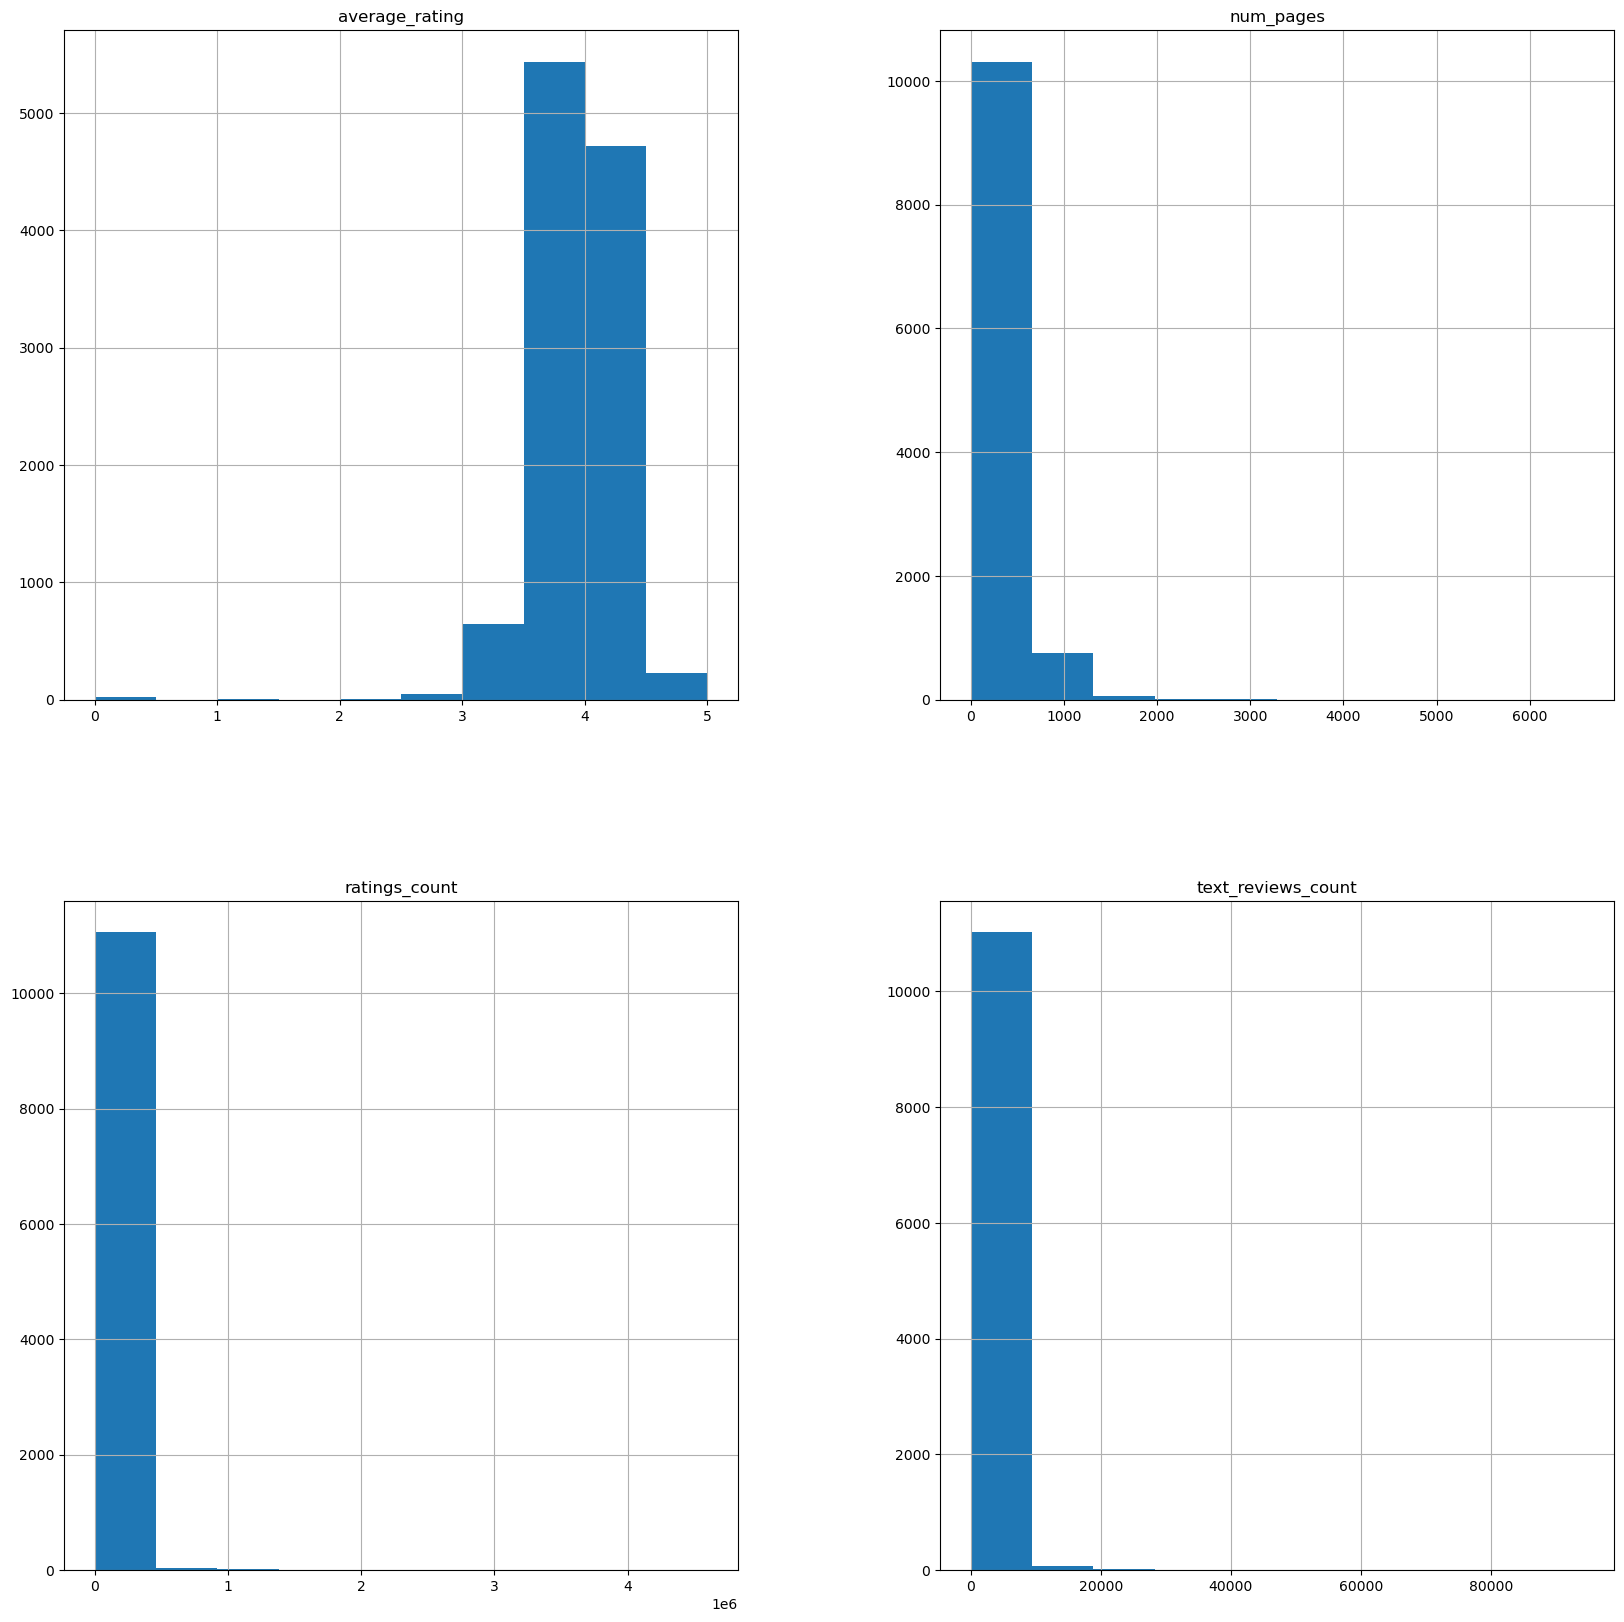

In [13]:
fig1 = plt.figure(figsize = (20,20))
ax = fig1.gca()
df[continuousVars2].hist(ax = ax)
plt.show()

To further understand the data better, a density curve can be added to the histograms to shed some light on the distribution type

<Axes: xlabel='average_rating', ylabel='Count'>

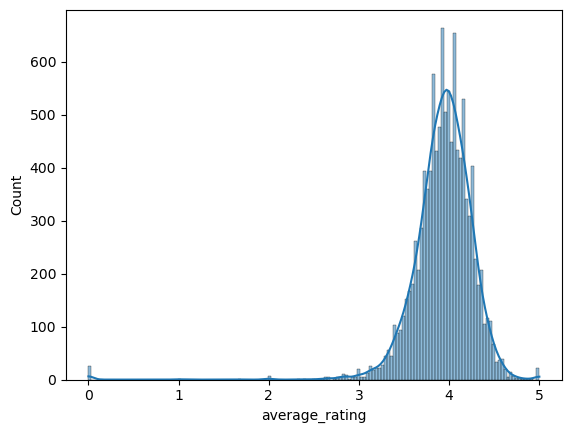

In [14]:
sns.histplot(x = 'average_rating', data = df, kde = True)

From the Histogram we can see that Average Rating has an expected normal distribution.

<Axes: xlabel='num_pages', ylabel='Count'>

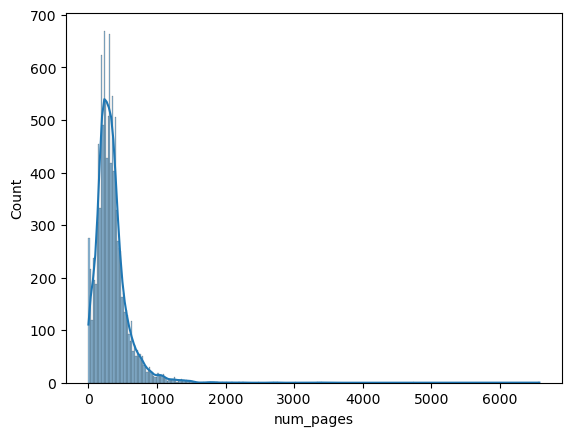

In [15]:
sns.histplot(x = 'num_pages', data = df, kde = True)

We can also see that the distribution for number of pages is skewed to the left. 

(0.0, 1000.0)

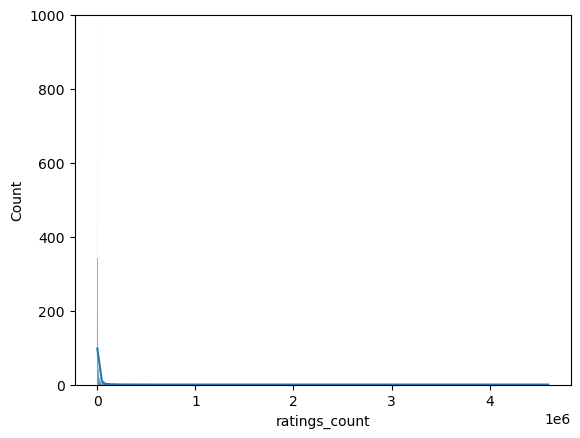

In [16]:
sns.histplot(x = 'ratings_count', data = df, kde = True)
plt.ylim(0,1000)

The histogram shows that, rating count is left skewed and may include extreme values

(0.0, 1500.0)

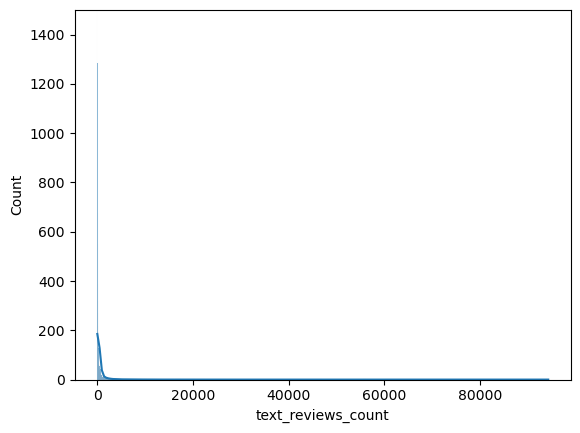

In [17]:
sns.histplot(x = 'text_reviews_count', data = df, kde = True)
plt.ylim(0,1500)

The histogram also shows that, text reviews count is left skewed and may also include extreme values

#### To Further Investigate extreme values and outliers, we can visualise the data with Boxplots.

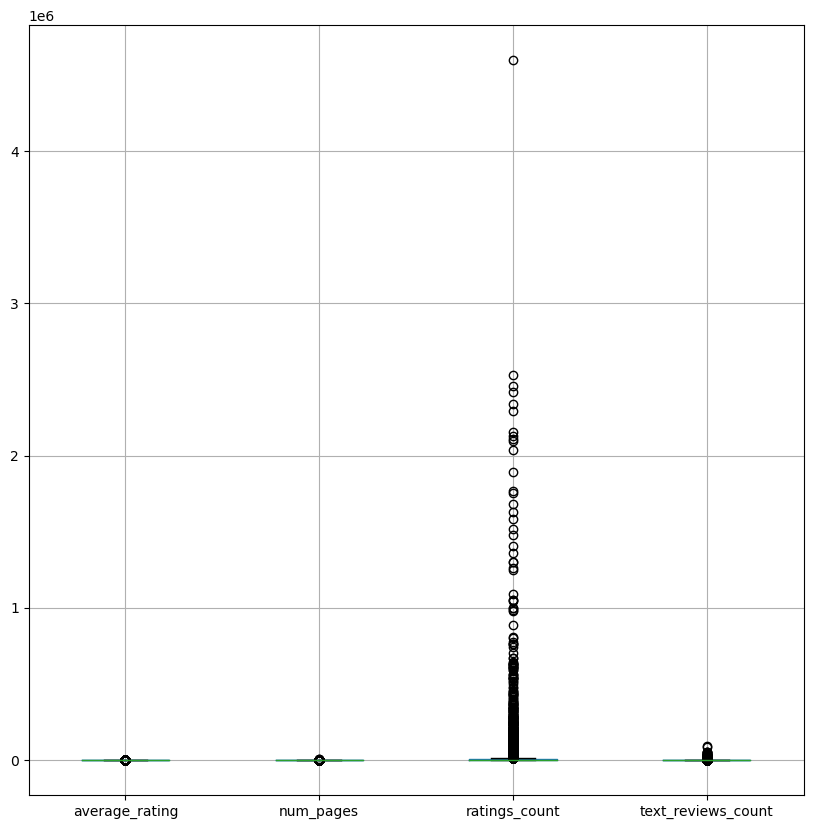

In [18]:
plt.figure(figsize = (10, 10))
df.boxplot(column= ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count'])
plt.show()

We can see that we have some outliers for ratings_count very close to the 5x10^6 range, the outliers can be removed to see to see the effects on the box plot.

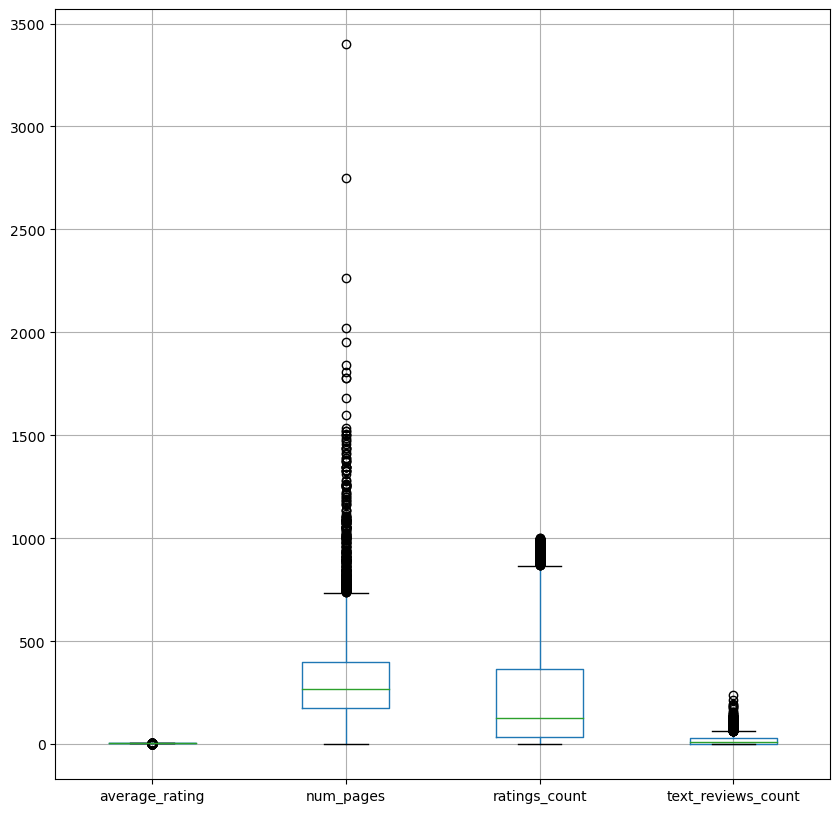

In [19]:
df2 = df[(df['ratings_count'] < 1000)]
plt.figure(figsize = (10, 10))
df2.boxplot(column= ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count'])
plt.show()

In order to be able to properly  view the variables on the same scale we have to normalise the data.

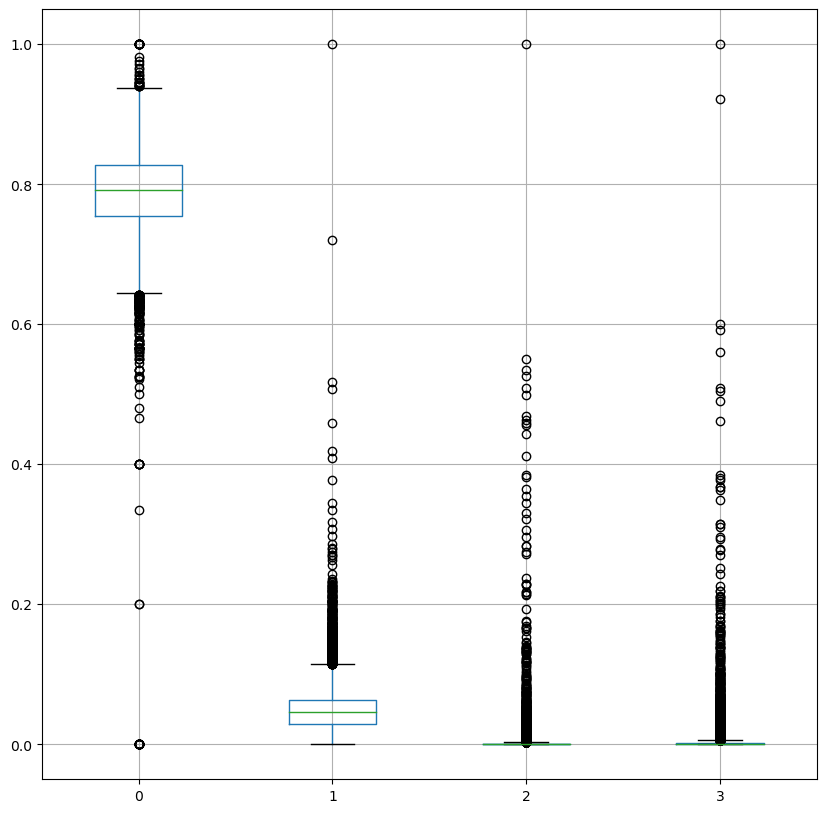

In [20]:
Normalized_Vars = df[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']].values.astype(float)
range_Scaler = preprocessing.MinMaxScaler()
Scaled_Vars = range_Scaler.fit_transform(Normalized_Vars)
df_normalized = pd.DataFrame(Scaled_Vars)
plt.figure(figsize = (10, 10))
df_normalized.boxplot()
plt.show()

The results is inline with our expectactions and fits our four variables on the same scake. It also shows that many of the data points fall outside the Inter Quartile Range, min and max values.

#### Finally, lets take a look at the categorical variables in the data

In [21]:
categoricalVars = ['title', 'authors', 'isbn', 'language_code', 'publisher']
df[categoricalVars].describe()

,title,authors,isbn,language_code,publisher
count,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,2290
top,The Iliad,Stephen King,0439785960,eng,Vintage
freq,9,40,1,8908,318


From the results, we can conclude a few details; 

- The most frequently occuring book title is 'The lliad' (9).
- The author with the most books (40) is Stephen King.
- Majority of the books are written in English (8908/11123).
- The most frequently occuring publisher is Vintage (318).

### Data Exploration & Feature Selection

To better analyse the data, we need to explore it further. Below, we will explore questions like, which books received the most ratings? Which authors wrote the most books? Who are the top rated authors and so on.

##### Which Authors wrote the most books?

In [22]:
allAuthors = df.authors.unique()
y_pos = np.arange(len(allAuthors))

print(len(allAuthors))

top10Authors = df[['authors', 'title']].groupby(['authors']).count()
top10Authors = top10Authors.sort_values(by=['title'], ascending=True)
top10Authors = top10Authors.tail(10)
top10Authors

6639


,title
authors,
James Patterson,23
Dick Francis,28
Sandra Brown,29
Mercedes Lackey,29
Piers Anthony,30
Agatha Christie,33
Orson Scott Card,35
Rumiko Takahashi,39
Stephen King,40


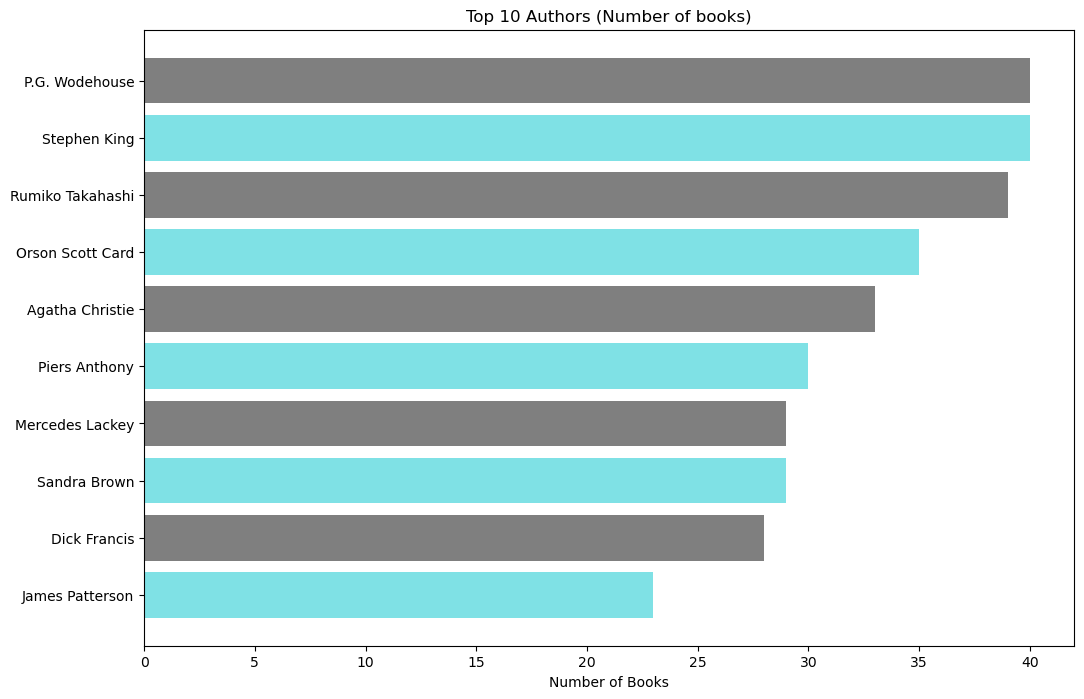

In [23]:
plt.figure(figsize=(12, 8))
y_NoTitles = top10Authors['title']
plt.barh(top10Authors.index.values, y_NoTitles, 0.8, align='center', alpha=0.5, color = ['#00C5CD', '#000000'])
plt.xlabel('Number of Books')
plt.title('Top 10 Authors (Number of books)')
plt.show()

We can see that Stephen King & P.G Wodehouse both wrote the highest number of books (40)

##### Which Authors performed the best and which performed the worst?

The aim of the model is to predict future performance, the variable used to measure performance in the data is 'average rating'. Therefore, an emphasis shall be placed on exploring the relationship between 'average rating' and other variables.

In [24]:
GoodRating = 4
GoodRatedAuthors = df[df['average_rating']>=GoodRating]

top10GoodAuthors = GoodRatedAuthors[['authors', 'title']].groupby(['authors']).count()
top10GoodAuthors = top10GoodAuthors.sort_values(by=['title'], ascending=True)
top10GoodAuthors = top10GoodAuthors.tail(10)
top10GoodAuthors

,title
authors,
Tite Kubo,14
Agatha Christie,14
Laurell K. Hamilton,15
Dr. Seuss,15
J.R.R. Tolkien,17
Stephen King,18
Terry Pratchett,18
Mercedes Lackey,19
P.G. Wodehouse,34


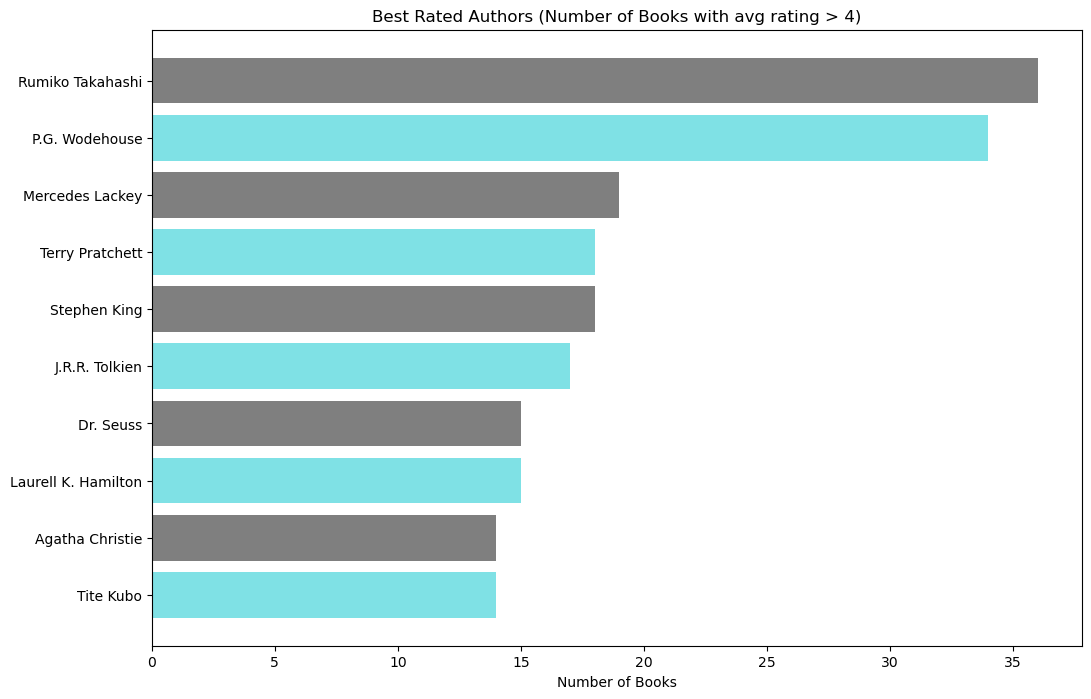

In [25]:
plt.figure(figsize=(12, 8))
y_NoTitles = top10GoodAuthors['title']
plt.barh(top10GoodAuthors.index.values, y_NoTitles, 0.8, align='center', alpha=0.5, color = ['#00C5CD', '#000000'])
plt.xlabel('Number of Books')
plt.title('Best Rated Authors (Number of Books with avg rating > 4)')
plt.show()

In [26]:
BadRating = 2
BadRatedAuthors = df[df['average_rating'] <= BadRating]

worst10Authors = BadRatedAuthors[['authors', 'title']].groupby(['authors']).count()
worst10Authors = worst10Authors.sort_values(by=['title'], ascending=True)
worst10Authors = worst10Authors.tail(5)
worst10Authors

,title
authors,
Apollodorus/Richard Wagner,1
Anthony E. Wolf,1
Jasmine C.M. Luk/Angel M.Y. Lin,1
Warren G. Bennis,1
Frederick P. Lenz,2


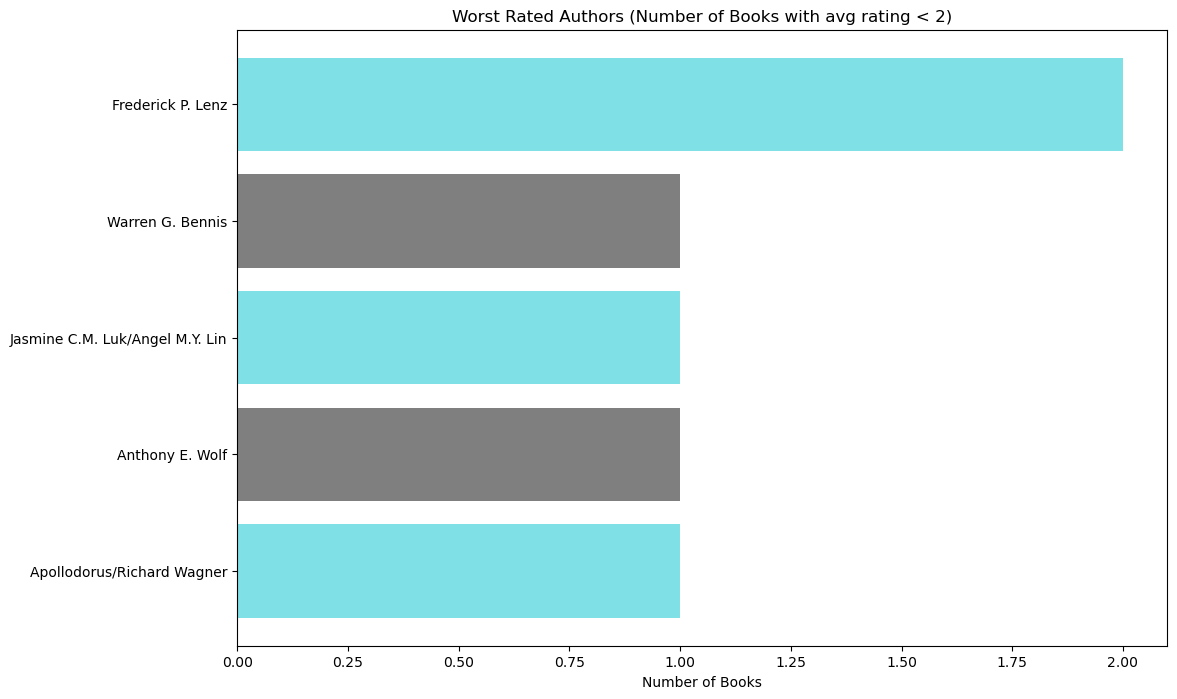

In [27]:
plt.figure(figsize=(12, 8))
y_NoTitles = worst10Authors['title']
plt.barh(worst10Authors.index.values, y_NoTitles, 0.8, align='center', alpha=0.5, color = ['#00C5CD', '#000000'])
plt.xlabel('Number of Books')
plt.title('Worst Rated Authors (Number of Books with avg rating < 2)')
plt.show()

In [28]:
pd.DataFrame(df.groupby(['authors'])['average_rating'].mean().head(10)).sort_values(by=['average_rating'],ascending=False)

,average_rating
authors,
A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,4.150
Abigail Adams/Frank Shuffelton,4.140
Abdul Rahman Munif/Peter Theroux,4.130
Abbie Hoffman/Anita Hoffman,3.960
A.S. Byatt,3.770
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,3.760
A.J. Jacobs,3.760
A.N. Roquelaure/Anne Rice,3.735
A.B. Yehoshua/Hillel Halkin,3.600


The Author with the highest average rating (4.15/5) is A.E.Cunningham et al.

#### Which Books Received the Highest Ratings?

In [29]:
pd.DataFrame(df.groupby(['title'])['average_rating'].mean().head(10)).sort_values(by=['average_rating'],ascending=False)

,average_rating
title,
100 Years of Lynchings,4.61000
100 Love Sonnets,4.39000
1000 Rings: Inspiring Adornments for the Hand,4.23000
said the shotgun to the head.,4.22000
'Salem's Lot,4.04875
100 Great Fantasy Short Short Stories,3.91000
10 lb Penalty,3.90000
1 000 Places to See Before You Die,3.85000
1000 Record Covers,3.85000


The Title with the highest average rating (4.61/5) is 100 Years of Lynchings

#### Which Publisher Received the Highest Ratings?

In [30]:
pd.DataFrame(df.groupby(['publisher'])['average_rating'].mean().head(10)).sort_values(by=['average_rating'],ascending=False)

,average_rating
publisher,
A K PETERS,4.500
AA World Services,4.450
A & C Black (Childrens books),4.400
1st World Library,4.180
A Harvest Book/Harcourt Inc.,4.070
ADV Manga,4.038
AHA! Process,3.900
10/18,3.650
1st Book Library,3.580


#### Which House Published the Most Books?

In [31]:
allPublishers = df.publisher.unique()
y_pos = np.arange(len(allPublishers))

print(len(allPublishers))

top10Publishers = df[['publisher', 'title']].groupby(['publisher']).count()
top10Publishers = top10Publishers.sort_values(by=['title'], ascending=True)
top10Publishers = top10Publishers.tail(10)
top10Publishers

2290


,title
publisher,
VIZ Media LLC,88
Bantam,110
Pocket Books,111
HarperCollins,112
Harper Perennial,112
Ballantine Books,144
Mariner Books,150
Penguin Classics,184
Penguin Books,261


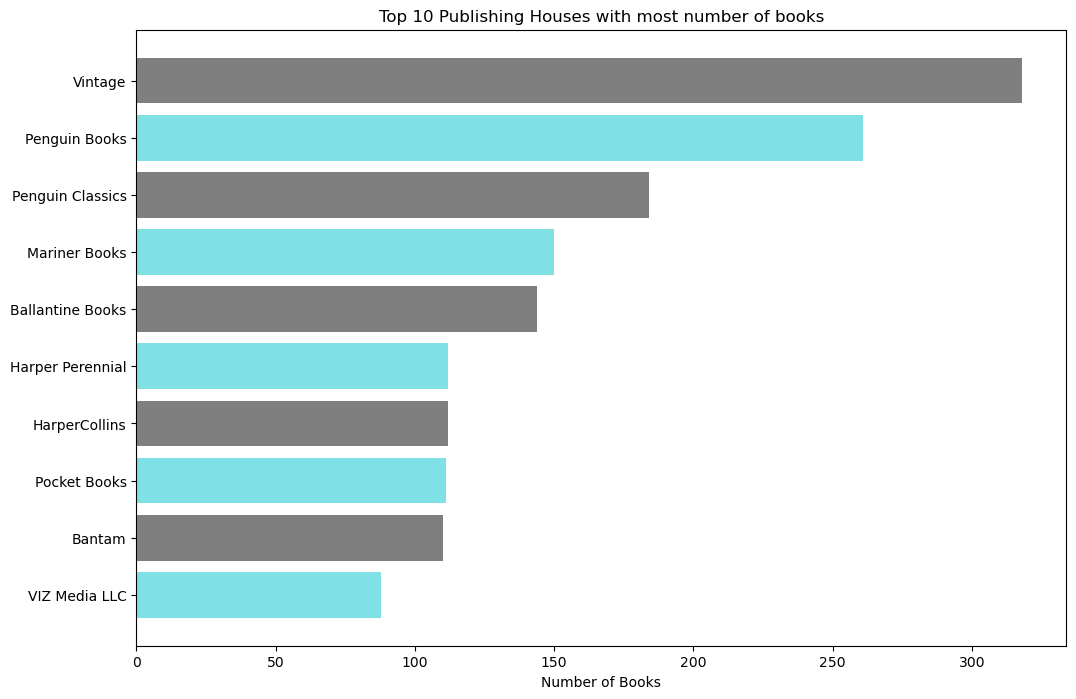

In [32]:
plt.figure(figsize=(12, 8))
y_NoTitles = top10Publishers['title']
plt.barh(top10Publishers.index.values, y_NoTitles, 0.8, align='center', alpha=0.5, color = ['#00C5CD', '#000000'])
plt.xlabel('Number of Books')
plt.title('Top 10 Publishing Houses with most number of books')
plt.show()

##### Top 10 Rated Publishers

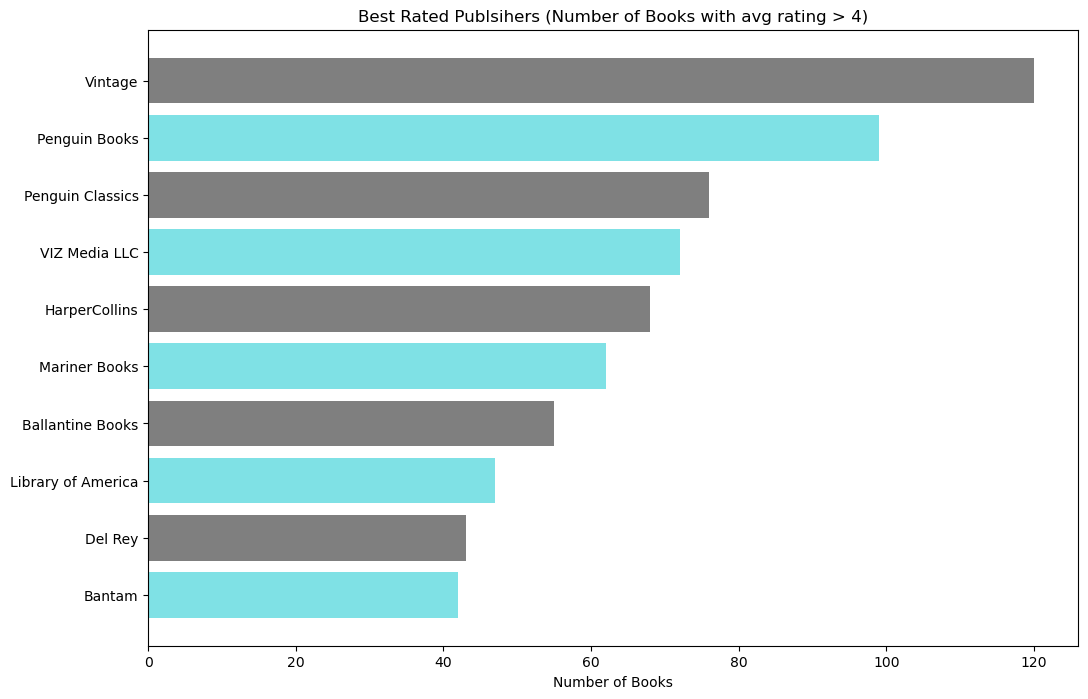

In [33]:
GoodRatedPublishers = df[df['average_rating']>=GoodRating]

top10GoodPublishers = GoodRatedPublishers[['publisher', 'title']].groupby(['publisher']).count()
top10GoodPublishers = top10GoodPublishers.sort_values(by=['title'], ascending=True)
top10GoodPublishers = top10GoodPublishers.tail(10)

plt.figure(figsize=(12, 8))
y_NoTitles = top10GoodPublishers['title']
plt.barh(top10GoodPublishers.index.values, y_NoTitles, 0.8, align='center', alpha=0.5, color = ['#00C5CD', '#000000'])
plt.xlabel('Number of Books')
plt.title('Best Rated Publsihers (Number of Books with avg rating > 4)')
plt.show()

#### Which Titles accrued the most ratings

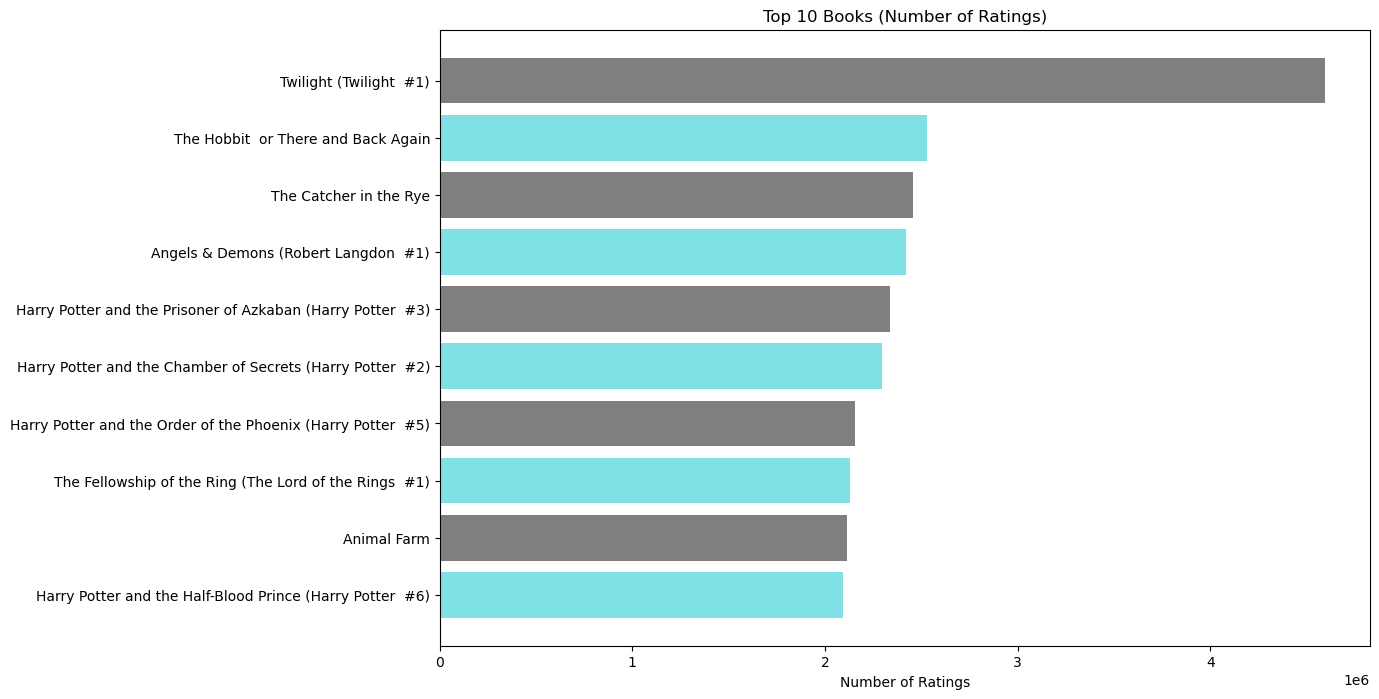

In [34]:
top10Titles = df.nlargest(10, ['ratings_count'])
top10TitlesG = top10Titles[['title', 'ratings_count']]
top10TitlesG = top10TitlesG.sort_values(by=['ratings_count'], ascending=True)

plt.figure(figsize=(12, 8))
y_NoTitles = top10TitlesG['title']
plt.barh(y_NoTitles, top10TitlesG.ratings_count, 0.8, align='center', alpha=0.5, color = ['#00C5CD', '#000000'])
plt.xlabel('Number of Ratings')
plt.title('Top 10 Books (Number of Ratings)')
plt.show()

We see that Twilight #1 accrued the most ratings approaching a count number of nearly 5 million

### Book Distribution by Language

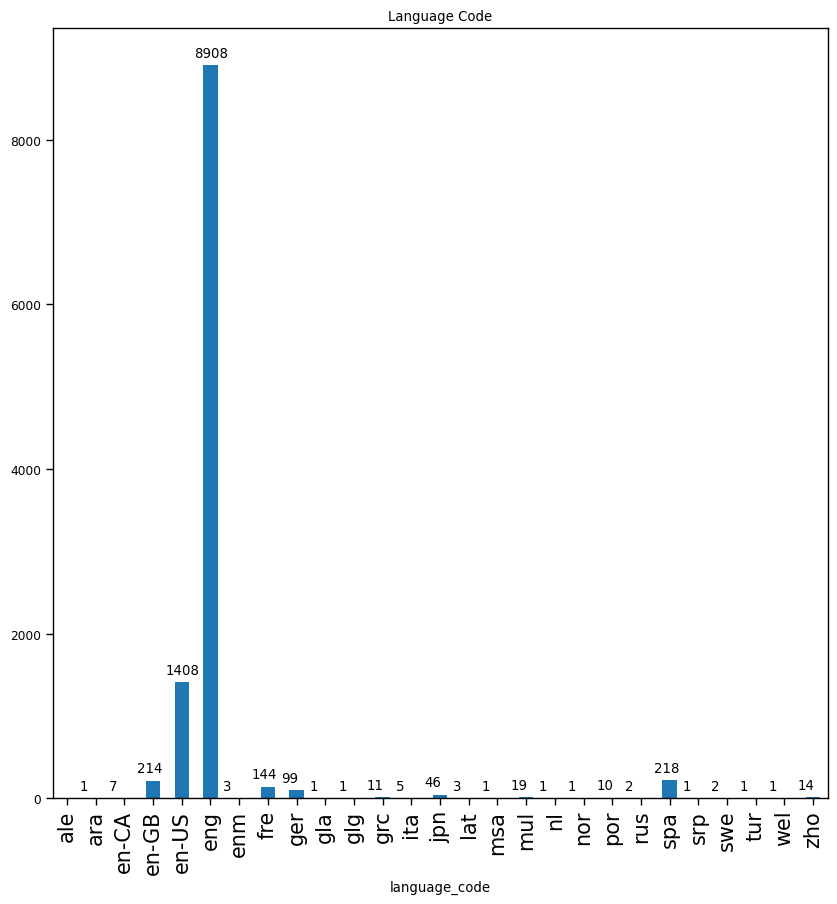

In [35]:
sns.set_context('paper')
plt.figure(figsize=(10,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))
plt.show()

We can see that Majority of the books are in 'eng';
- that only 7 languages have a book count of > 45.
- ~95% of the books fall into 7 languages.


Lets look at the % spread amongst those 7 languages.

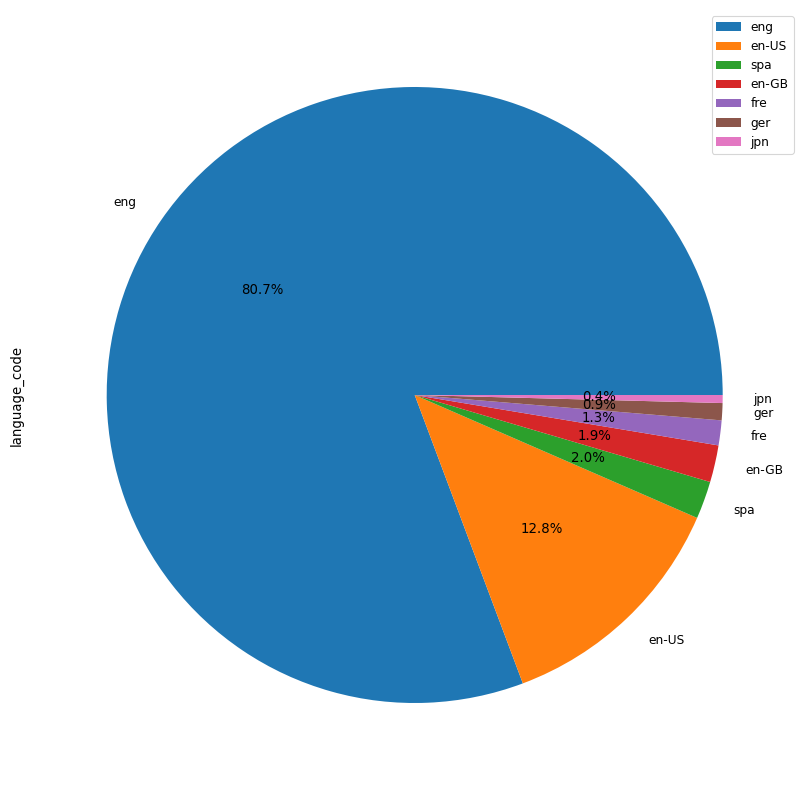

In [36]:
df['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(10, 10), autopct = '%1.1f%%').legend()
plt.show()

### Further Exploration

To better understand the relationships between the variables, we can check the correlation amonsgt variables.

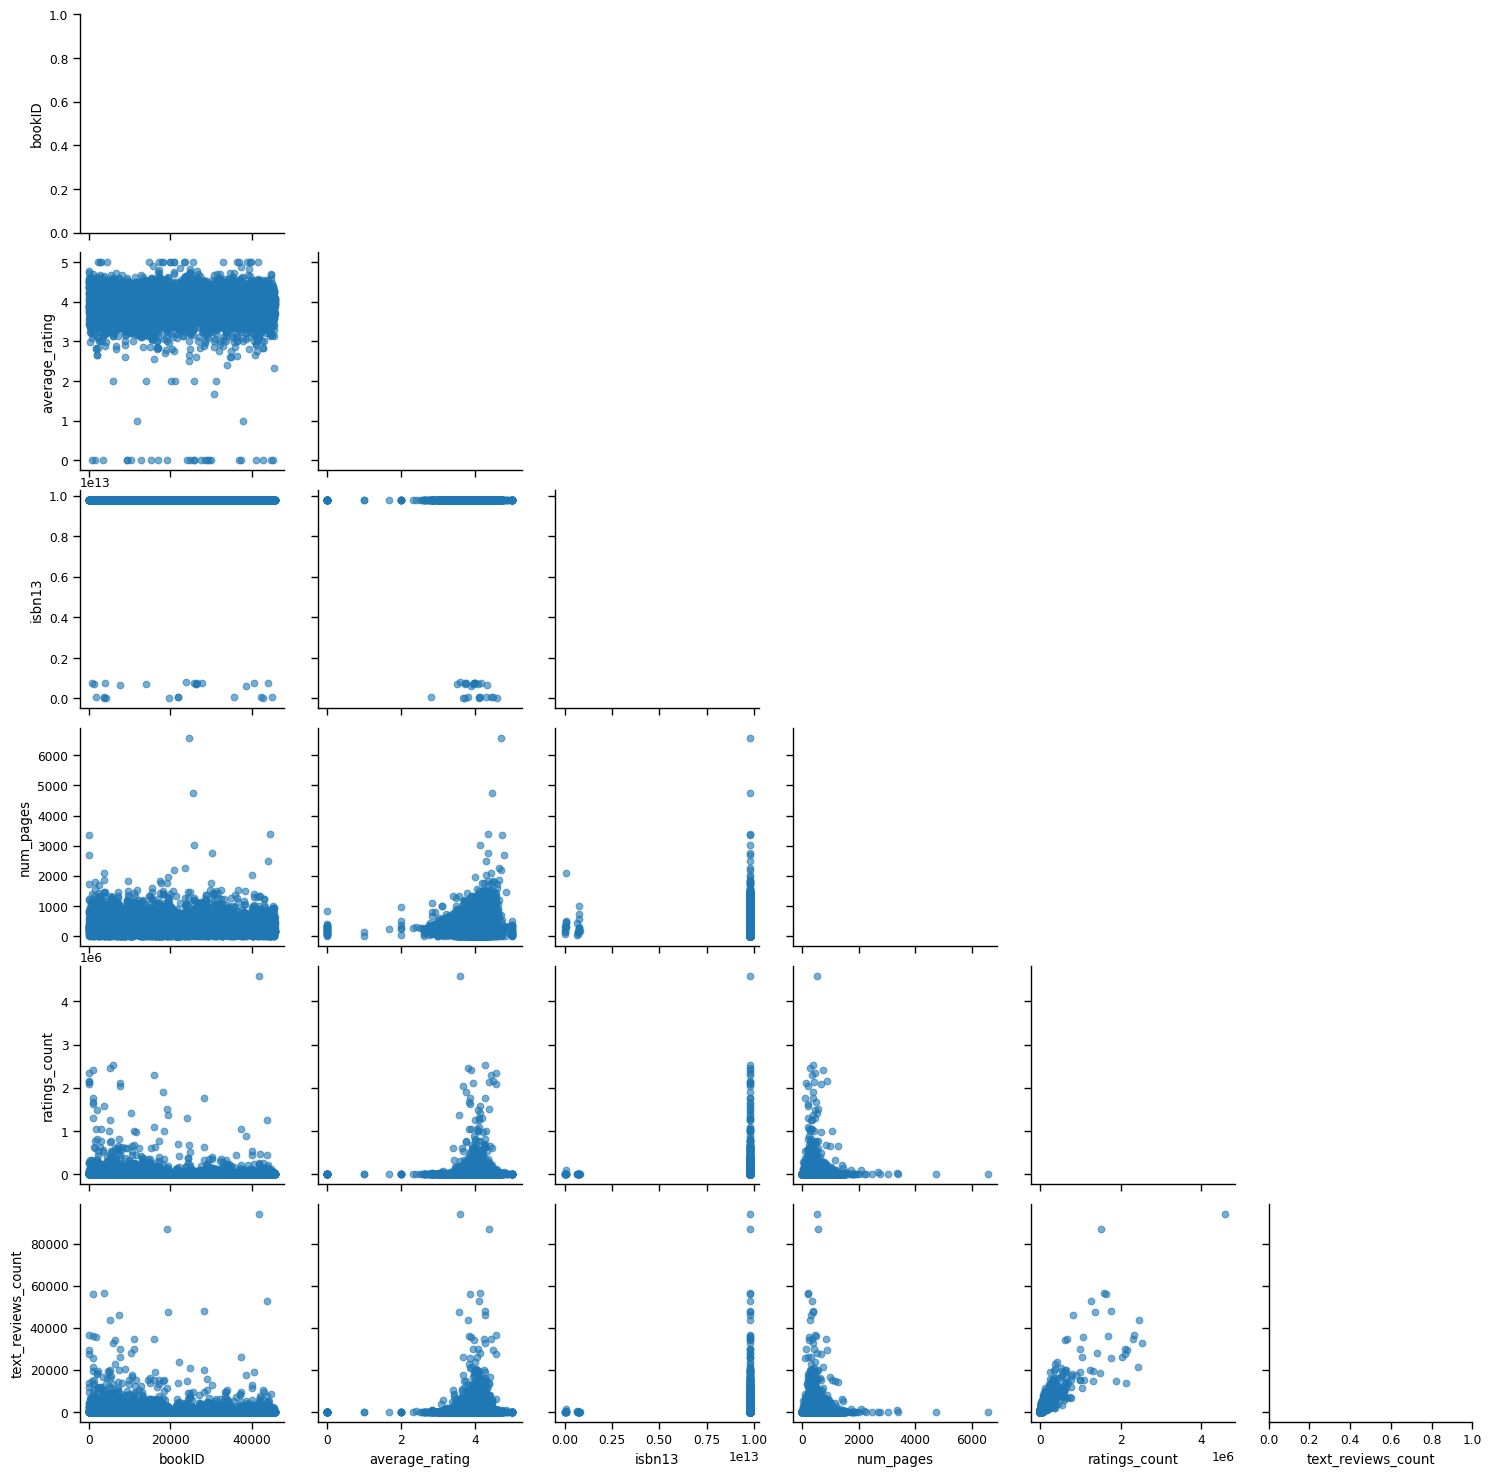

In [37]:
g = sns.PairGrid(df,diag_sharey = False, corner = True)
g.map_lower(plt.scatter, alpha = 0.6)

In [38]:
corr = df.corr()
corr

C:\Users\Ayanaba\AppData\Local\Temp\ipykernel_8740\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.036207,-0.002185,-0.026134,-0.076820,-0.081289
average_rating,-0.036207,1.000000,-0.001965,0.150477,0.038224,0.033663
isbn13,-0.002185,-0.001965,1.000000,-0.009818,0.005494,0.008152
num_pages,-0.026134,0.150477,-0.009818,1.000000,0.034337,0.036977
ratings_count,-0.076820,0.038224,0.005494,0.034337,1.000000,0.865977
text_reviews_count,-0.081289,0.033663,0.008152,0.036977,0.865977,1.000000


<Axes: >

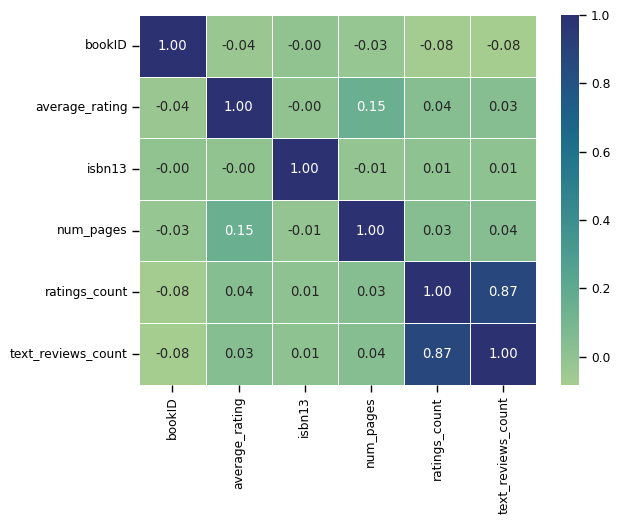

In [39]:
sns.heatmap(corr, annot= True, fmt=".2f", linewidths=.5, cmap="crest")

To Conclude, we can now tell that; 

- 'ratings_count' & 'text_reviews_count' have a high correlation factor of 0.87.
- There are no other significant correlations, with the second two most correlated variables being 'num_pages' & 'average_rating' at 0.15.

Since no single variable has a signigificant correlation with 'average_rating', we shall explore the influence of 'ratings_count' & 'text_reviews_count' combined on averagte rating.

### Exploring Text Reviews and Rating Counts.

##### Did the books with a high number of text reviews recieve higher ratings?

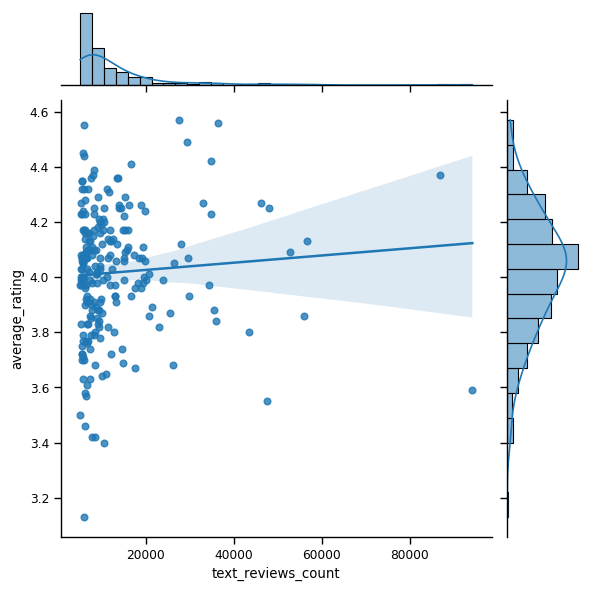

In [40]:
data_TextReviewsGreaterThan5K = df[df['text_reviews_count'] > 5000]

sns.jointplot(data=data_TextReviewsGreaterThan5K, x="text_reviews_count", y="average_rating", kind="reg")

From the results, we observe that as the text review count increases, the average rating increases slightly as well. However, we cannot call it a strong correlation.

##### Did the books with a high number of reviews recieve higher ratings?

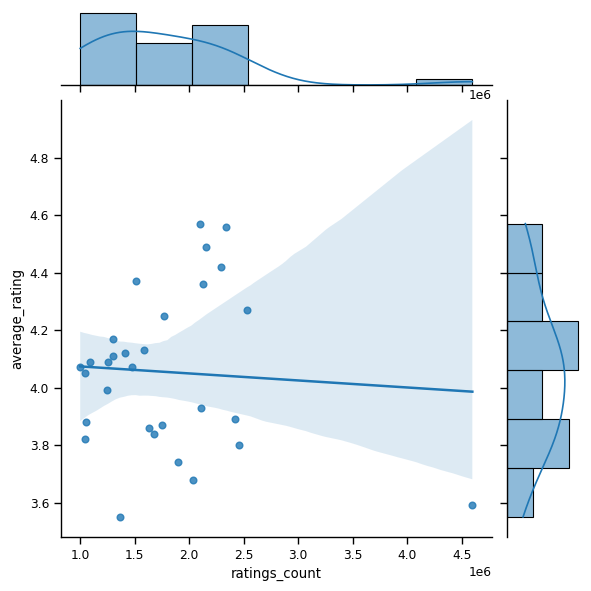

In [41]:
data_ReviewsGreaterThan1M = df[df['ratings_count'] > 1000000]

sns.jointplot(data=data_ReviewsGreaterThan1M, x="ratings_count", y="average_rating", kind="reg")

There is no correlation(if not ever so sightly negative) between books with a high number of reviews (rating counts) and average rating.

### Feature Engineering